In [1]:
df<-read.csv("case_time_series.csv")

In [2]:
df

index,Day,Daily.Count,Total.Confirmed,Daily.Recovered,Total.Recovered,Daily.Deceased,Total.Deceased,Date
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
0,1,0,3,0,3,0,0,1-Mar
1,2,2,5,0,3,0,0,2-Mar
2,3,1,6,0,3,0,0,3-Mar
3,4,22,28,0,3,0,0,4-Mar
4,5,2,30,0,3,0,0,5-Mar
5,6,1,31,0,3,0,0,6-Mar
6,7,3,34,0,3,0,0,7-Mar
7,8,5,39,0,3,0,0,8-Mar
8,9,9,48,0,3,0,0,9-Mar


In [3]:
attach(df)

In [4]:
names(df)

[1] "index"           "Day"             "Daily.Count"     "Total.Confirmed"
[5] "Daily.Recovered" "Total.Recovered" "Daily.Deceased"  "Total.Deceased" 
[9] "Date"

Daily Count

In [5]:
#linear model
linear.model_dc <-lm(Daily.Count ~ index)

In [6]:
summary(linear.model_dc)


Call:
lm(formula = Daily.Count ~ index)

Residuals:
   Min     1Q Median     3Q    Max 
-19098 -11384   -248   9473  26062 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -22019.8     1727.0  -12.75   <2e-16 ***
index          482.5       14.5   33.27   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12470 on 205 degrees of freedom
Multiple R-squared:  0.8437,	Adjusted R-squared:  0.843 
F-statistic:  1107 on 1 and 205 DF,  p-value: < 2.2e-16


In [11]:
linear.model_dc


Call:
lm(formula = Daily.Count ~ index)

Coefficients:
(Intercept)        index  
   -22019.8        482.5  


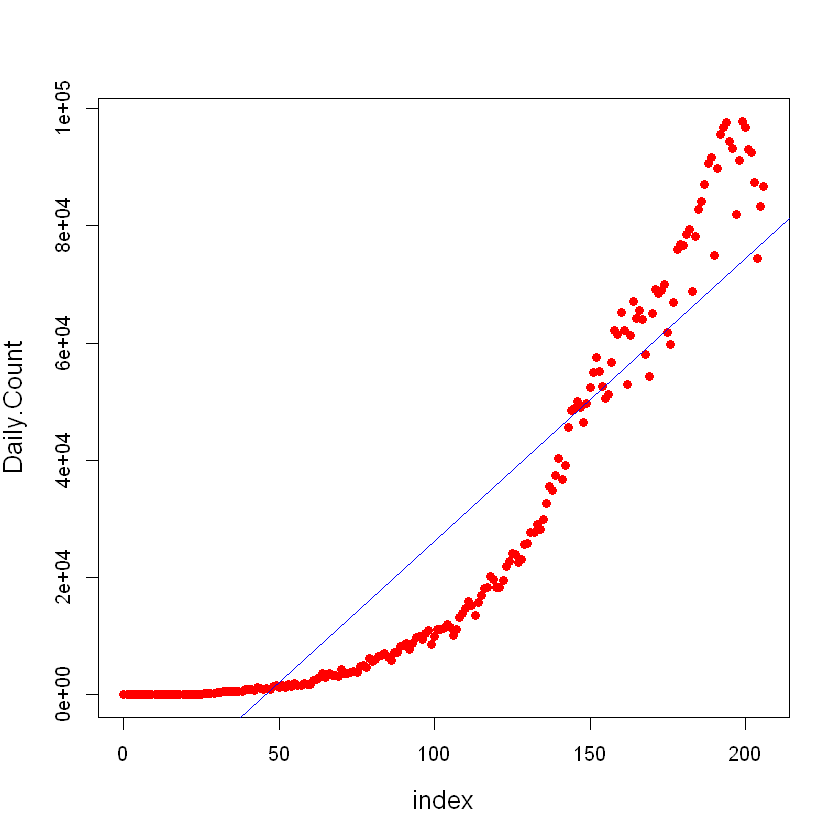

In [7]:
plot(index, Daily.Count, pch=16, ylab = "Daily.Count", cex.lab = 1.3, col = "red" )

abline(lm(Daily.Count ~ index), col = "blue")

Quadratic model

In [8]:
index2 <- index^2
quadratic.model_dc <-lm(Daily.Count ~ index + index2)

In [9]:
summary(quadratic.model_dc)


Call:
lm(formula = Daily.Count ~ index + index2)

Residuals:
     Min       1Q   Median       3Q      Max 
-25709.2  -2795.8    407.5   2082.5  11122.8 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3226.9493   992.0782   3.253  0.00134 ** 
index       -256.3875    22.2505 -11.523  < 2e-16 ***
index2         3.5870     0.1046  34.309  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4804 on 204 degrees of freedom
Multiple R-squared:  0.9769,	Adjusted R-squared:  0.9767 
F-statistic:  4317 on 2 and 204 DF,  p-value: < 2.2e-16


In [10]:
quadratic.model_dc


Call:
lm(formula = Daily.Count ~ index + index2)

Coefficients:
(Intercept)        index       index2  
   3226.949     -256.387        3.587  


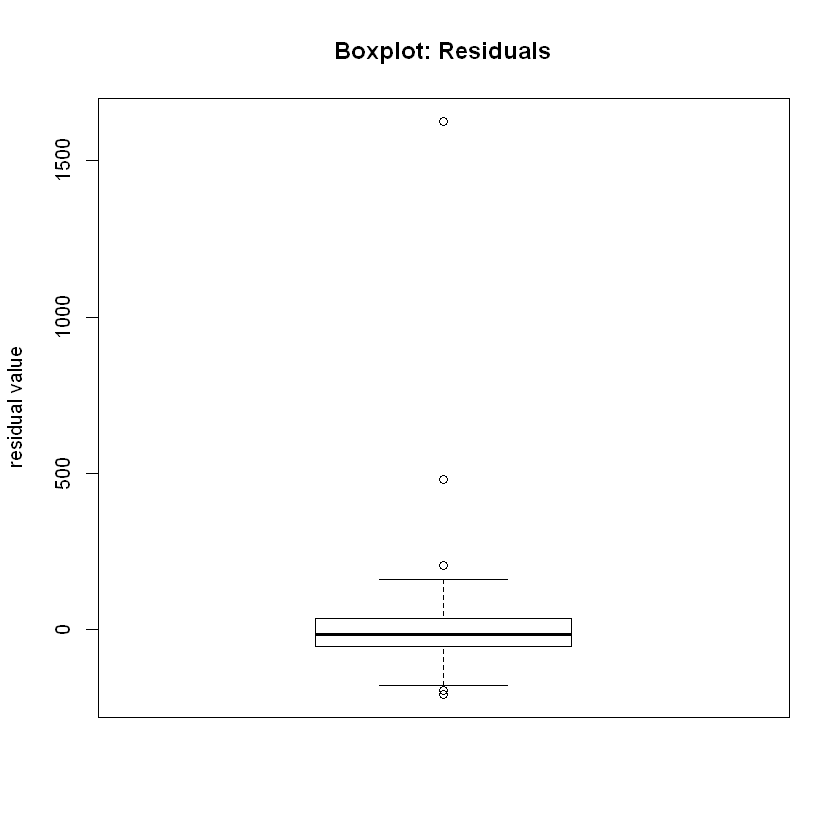

In [89]:
boxplot(quadratic.model_dc[['residuals']],main='Boxplot: Residuals',ylab='residual value')

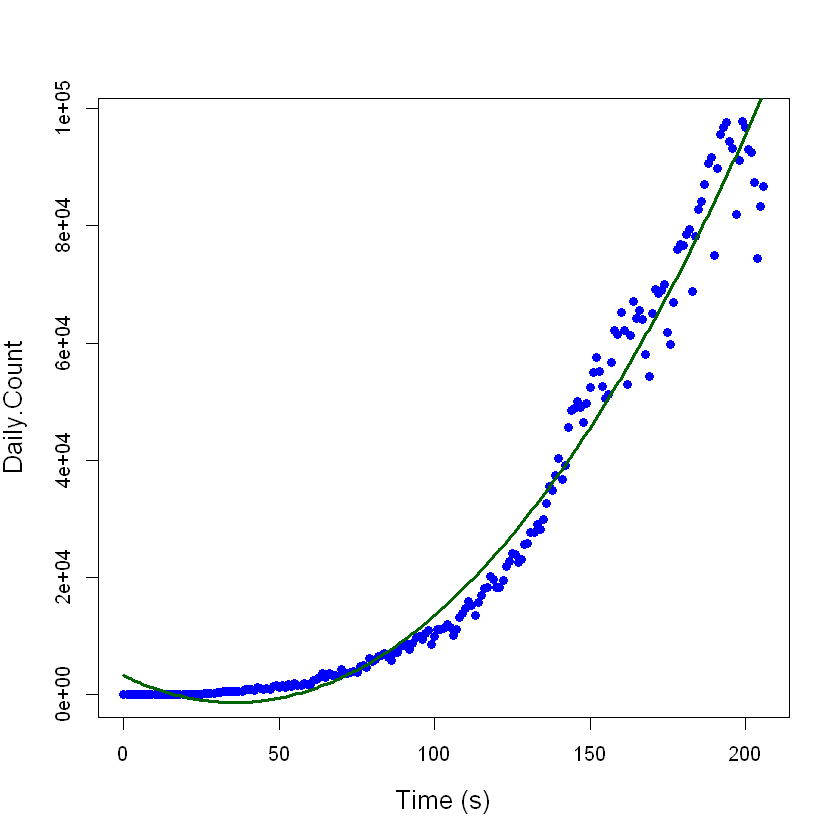

In [13]:
timevalues <- seq(0, 206, 1)
predictedcounts <- predict(quadratic.model_dc,list(index=timevalues, index2=timevalues^2))
plot(index, Daily.Count, pch=16, xlab = "Time (s)", ylab = "Daily.Count", cex.lab = 1.3, col = "blue")
lines(timevalues, predictedcounts, col = "darkgreen", lwd = 3)

In [14]:
#Polynomial
index2 <- index^2
index3 <- index^3
poly.model_dc <-lm(Daily.Count ~ index + index2 + index3)

In [16]:
summary(poly.model_dc)


Call:
lm(formula = Daily.Count ~ index + index2 + index3)

Residuals:
   Min     1Q Median     3Q    Max 
-24455  -3290    627   2522  10527 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.644e+03  1.306e+03   3.555  0.00047 ***
index       -3.399e+02  5.504e+01  -6.176 3.53e-09 ***
index2       4.603e+00  6.218e-01   7.404 3.46e-12 ***
index3      -3.289e-03  1.984e-03  -1.658  0.09883 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4783 on 203 degrees of freedom
Multiple R-squared:  0.9772,	Adjusted R-squared:  0.9769 
F-statistic:  2904 on 3 and 203 DF,  p-value: < 2.2e-16


In [15]:
poly.model_dc


Call:
lm(formula = Daily.Count ~ index + index2 + index3)

Coefficients:
(Intercept)        index       index2       index3  
  4.644e+03   -3.399e+02    4.603e+00   -3.289e-03  


In [91]:
4783/mean(Daily.Count)

[1] 0.1727833

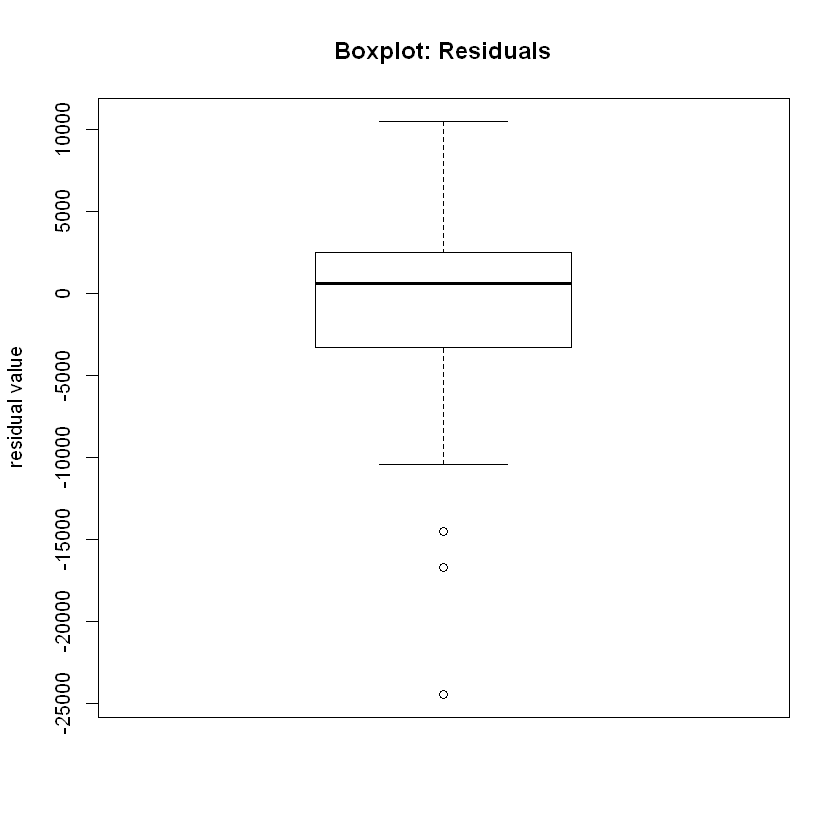

In [90]:
boxplot(poly.model_dc[['residuals']],main='Boxplot: Residuals',ylab='residual value')

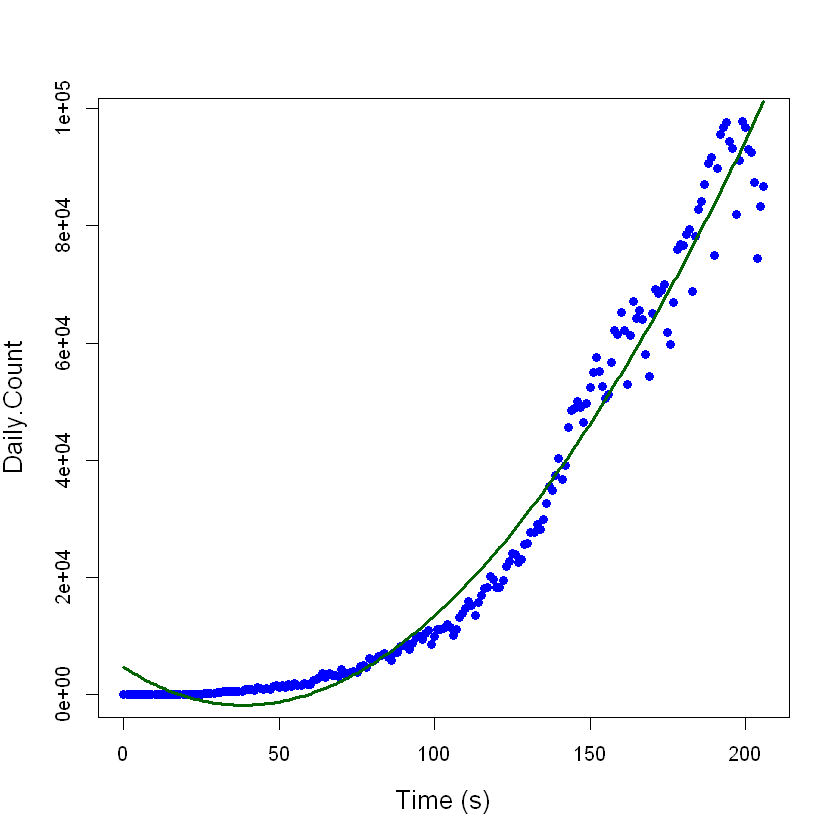

In [17]:
timevalues <- seq(0, 206, 1)
predictedcounts <- predict(poly.model_dc,list(index=timevalues, index2=timevalues^2, index3=timevalues^3))
plot(index, Daily.Count, pch=16, xlab = "Time (s)", ylab = "Daily.Count", cex.lab = 1.3, col = "blue")
lines(timevalues, predictedcounts, col = "darkgreen", lwd = 3)

In [18]:
#exponential
logdc <- log(Daily.Count)
logdc[which(!is.finite(logdc))] <- 0

In [19]:
exponential.model_dc <- lm(logdc~ index)
summary(exponential.model_dc)


Call:
lm(formula = logdc ~ index)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3021 -0.6702  0.4124  0.8501  1.3356 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.08462    0.15843   25.78   <2e-16 ***
index        0.04350    0.00133   32.69   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.144 on 205 degrees of freedom
Multiple R-squared:  0.8391,	Adjusted R-squared:  0.8383 
F-statistic:  1069 on 1 and 205 DF,  p-value: < 2.2e-16


In [22]:
exponential.model_dc


Call:
lm(formula = logdc ~ index)

Coefficients:
(Intercept)        index  
     4.0846       0.0435  


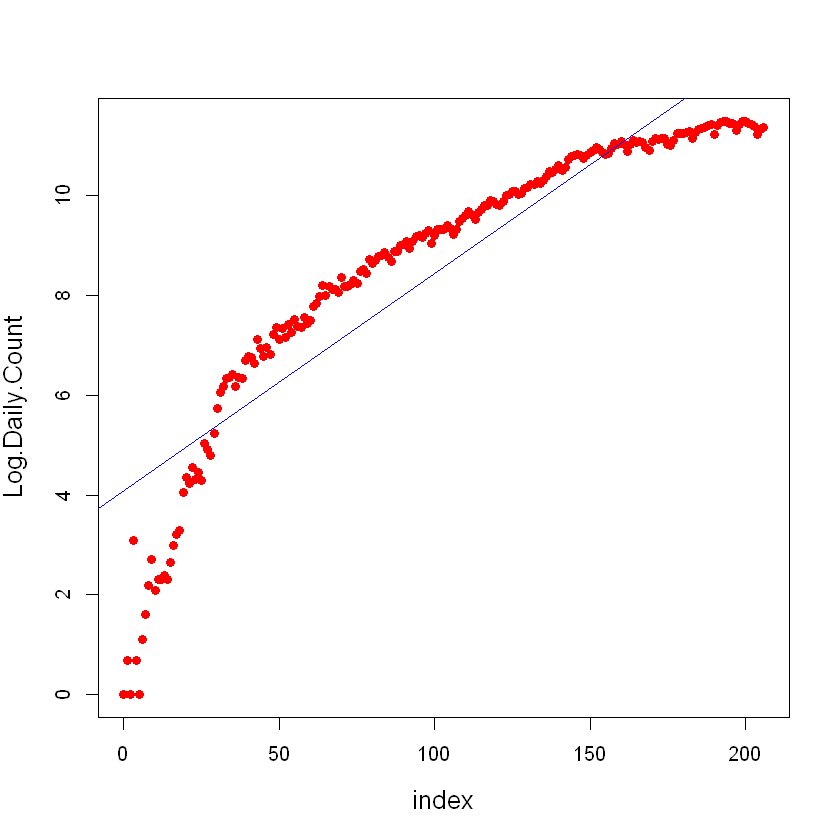

In [20]:
plot(index, logdc, pch=16, ylab = "Log.Daily.Count", cex.lab = 1.3, col = "red" )
abline(lm(logdc ~ index), col = "blue")

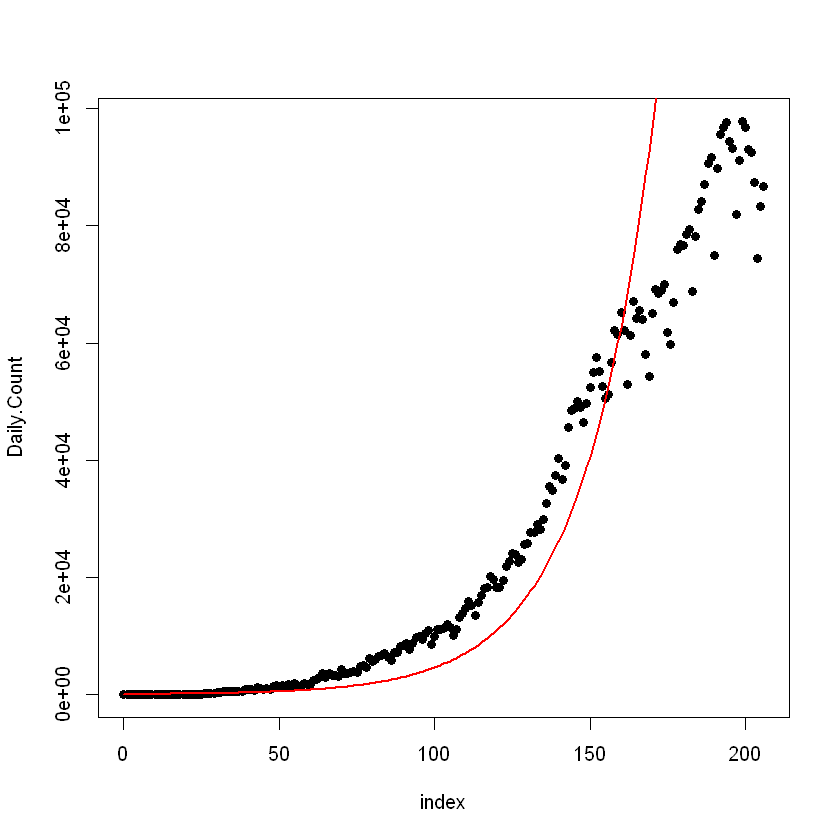

In [21]:
timevalues <- seq(0, 206, 1)
Counts.exponential2 <- exp(predict(exponential.model_dc,list(Time=timevalues)))
plot(index, Daily.Count,pch=16)
lines(timevalues, Counts.exponential2,lwd=2, col = "red", xlab = "Time (s)", ylab = "Daily.Count")

Daily Recovered

In [23]:
linear.model_dr <-lm(Daily.Recovered ~ index)

In [24]:
summary(linear.model_dr)


Call:
lm(formula = Daily.Recovered ~ index)

Residuals:
   Min     1Q Median     3Q    Max 
-19857 -12178    -94   9923  36898 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20877.03    1776.27  -11.75   <2e-16 ***
index          421.81      14.92   28.28   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12820 on 205 degrees of freedom
Multiple R-squared:  0.7959,	Adjusted R-squared:  0.7949 
F-statistic: 799.6 on 1 and 205 DF,  p-value: < 2.2e-16


In [25]:
linear.model_dr


Call:
lm(formula = Daily.Recovered ~ index)

Coefficients:
(Intercept)        index  
   -20877.0        421.8  


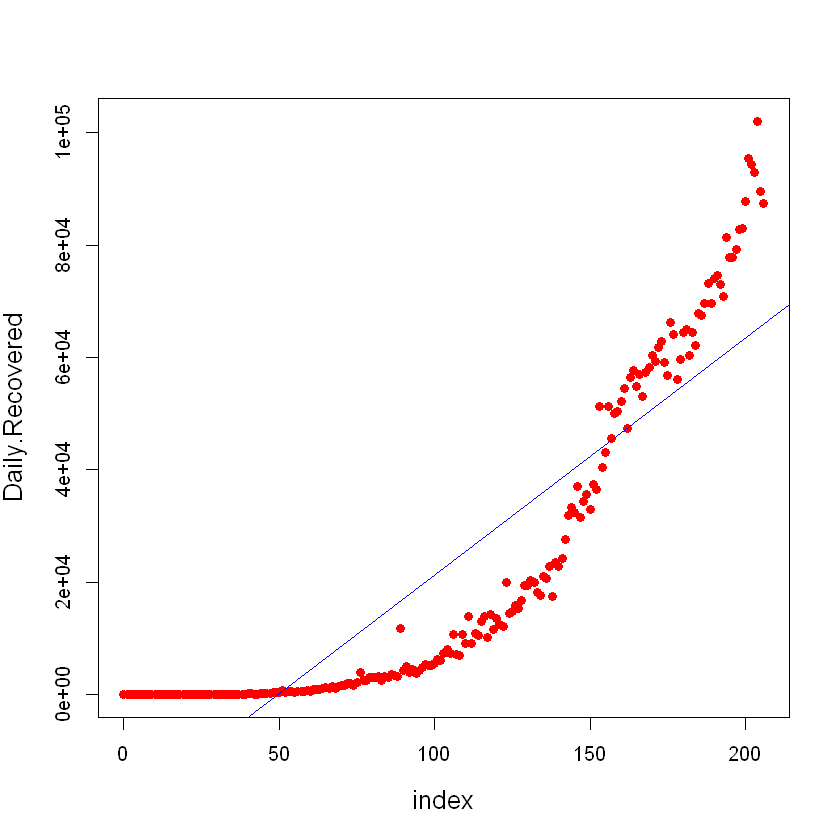

In [26]:
plot(index, Daily.Recovered, pch=16, ylab = "Daily.Recovered", cex.lab = 1.3, col = "red" )

abline(lm(Daily.Recovered ~ index), col = "blue")

In [27]:
index2 <- index^2
quadratic.model_dr <-lm(Daily.Recovered ~ index + index2)

In [28]:
summary(quadratic.model_dr)


Call:
lm(formula = Daily.Recovered ~ index + index2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10913.0  -2722.0    197.8   2669.4  11790.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5958.57848  795.11096   7.494 1.99e-12 ***
index       -363.62399   17.83292 -20.391  < 2e-16 ***
index2         3.81278    0.08379  45.502  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3850 on 204 degrees of freedom
Multiple R-squared:  0.9817,	Adjusted R-squared:  0.9815 
F-statistic:  5471 on 2 and 204 DF,  p-value: < 2.2e-16


In [30]:
quadratic.model_dr


Call:
lm(formula = Daily.Recovered ~ index + index2)

Coefficients:
(Intercept)        index       index2  
   5958.578     -363.624        3.813  


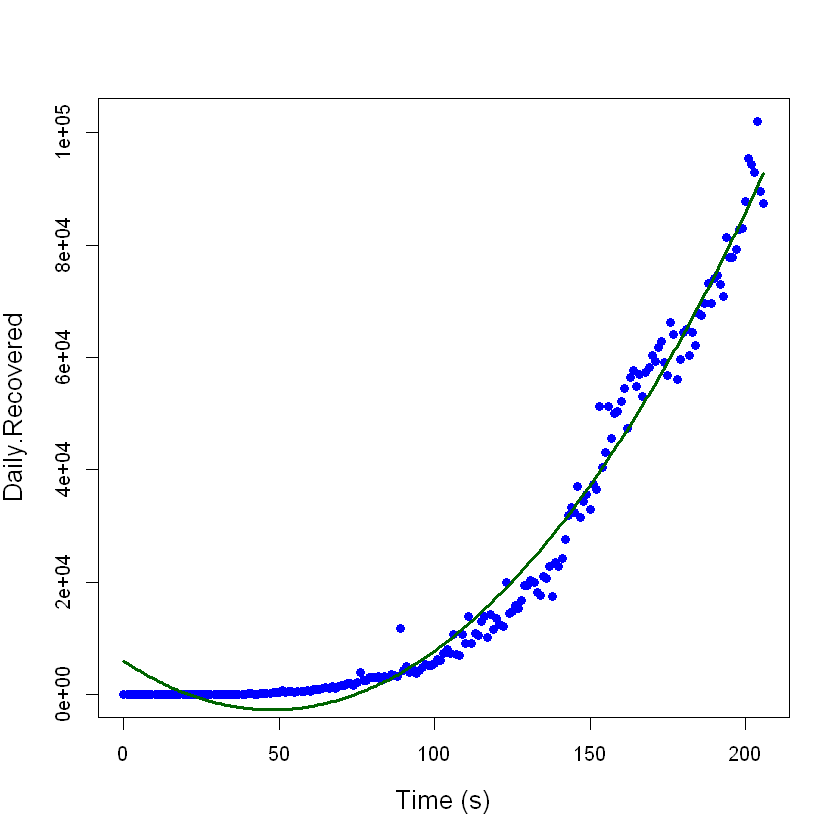

In [31]:
timevalues <- seq(0, 206, 1)
predictedcounts <- predict(quadratic.model_dr,list(index=timevalues, index2=timevalues^2))
plot(index, Daily.Recovered, pch=16, xlab = "Time (s)", ylab = "Daily.Recovered", cex.lab = 1.3, col = "blue")
lines(timevalues, predictedcounts, col = "darkgreen", lwd = 3)

In [32]:
index2 <- index^2
index3 <- index^3
poly.model_dr <-lm(Daily.Recovered ~ index + index2 + index3)

In [33]:
summary(poly.model_dr)


Call:
lm(formula = Daily.Recovered ~ index + index2 + index3)

Residuals:
   Min     1Q Median     3Q    Max 
 -9373  -2121    202   1280  13451 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.316e+03  9.788e+02   2.366 0.018905 *  
index       -1.488e+02  4.125e+01  -3.608 0.000388 ***
index2       1.200e+00  4.659e-01   2.575 0.010731 *  
index3       8.456e-03  1.487e-03   5.688 4.43e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3584 on 203 degrees of freedom
Multiple R-squared:  0.9842,	Adjusted R-squared:  0.984 
F-statistic:  4219 on 3 and 203 DF,  p-value: < 2.2e-16


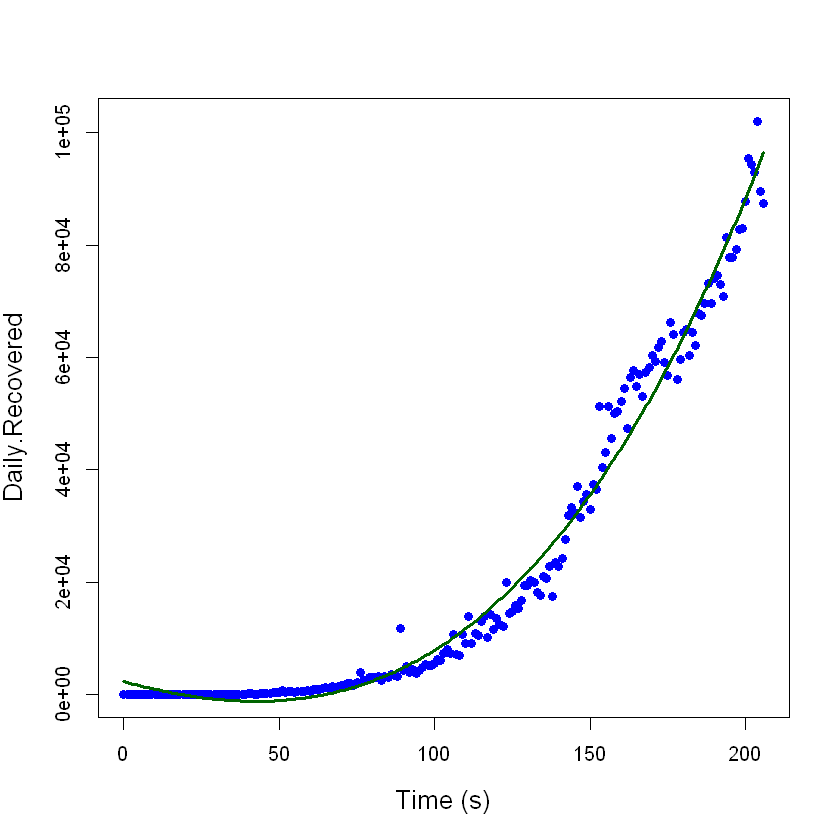

In [34]:
timevalues <- seq(0, 206, 1)
predictedcounts <- predict(poly.model_dr,list(index=timevalues, index2=timevalues^2))
plot(index, Daily.Recovered, pch=16, xlab = "Time (s)", ylab = "Daily.Recovered", cex.lab = 1.3, col = "blue")
lines(timevalues, predictedcounts, col = "darkgreen", lwd = 3)

In [35]:
logdr <- log(Daily.Recovered)
logdr[which(!is.finite(logdr))] <- 0

In [37]:
exponential.model_dr <- lm(logdr~ index)
summary(exponential.model_dr)


Call:
lm(formula = logdr ~ index)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2448 -0.9425  0.3474  1.0958  2.4017 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.094751   0.180501   11.61   <2e-16 ***
index       0.054763   0.001516   36.13   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.303 on 205 degrees of freedom
Multiple R-squared:  0.8643,	Adjusted R-squared:  0.8636 
F-statistic:  1305 on 1 and 205 DF,  p-value: < 2.2e-16


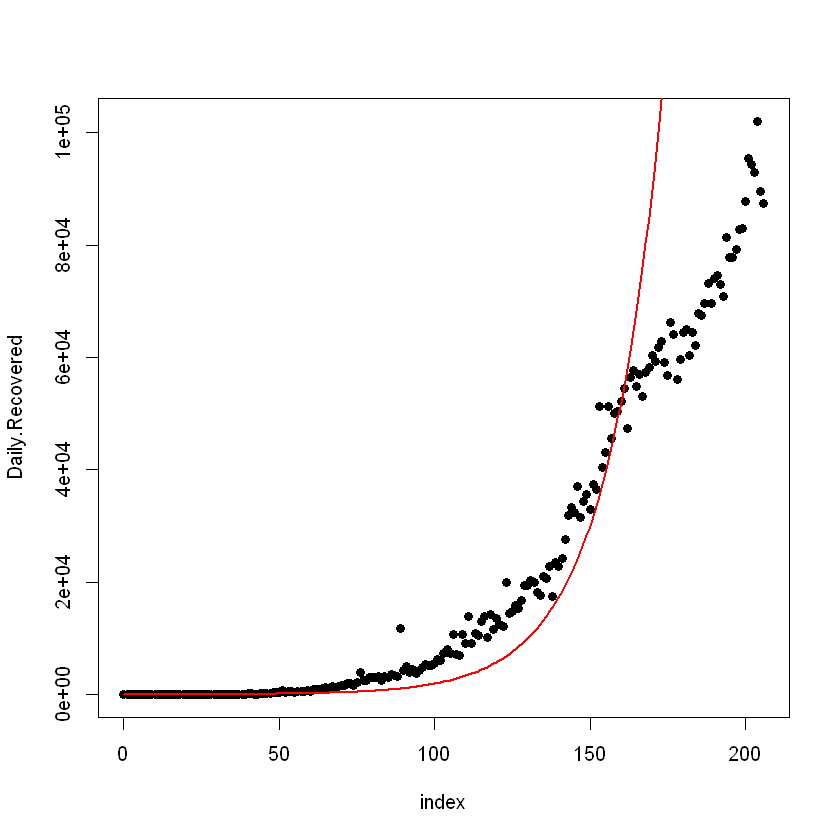

In [38]:
timevalues <- seq(0, 206, 1)
Counts.exponential2 <- exp(predict(exponential.model_dr,list(Time=timevalues)))
plot(index, Daily.Recovered,pch=16)
lines(timevalues, Counts.exponential2,lwd=2, col = "red", xlab = "Time (s)", ylab = "Daily.Recovered")

Daily Deceased

In [39]:
linear.model_dd <-lm(Daily.Deceased ~ index)

In [40]:
summary(linear.model_dd)


Call:
lm(formula = Daily.Deceased ~ index)

Residuals:
    Min      1Q  Median      3Q     Max 
-190.35 -106.82  -18.79   81.10 1540.48 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -228.9655    21.8315  -10.49   <2e-16 ***
index          6.4718     0.1833   35.30   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 157.6 on 205 degrees of freedom
Multiple R-squared:  0.8587,	Adjusted R-squared:  0.858 
F-statistic:  1246 on 1 and 205 DF,  p-value: < 2.2e-16


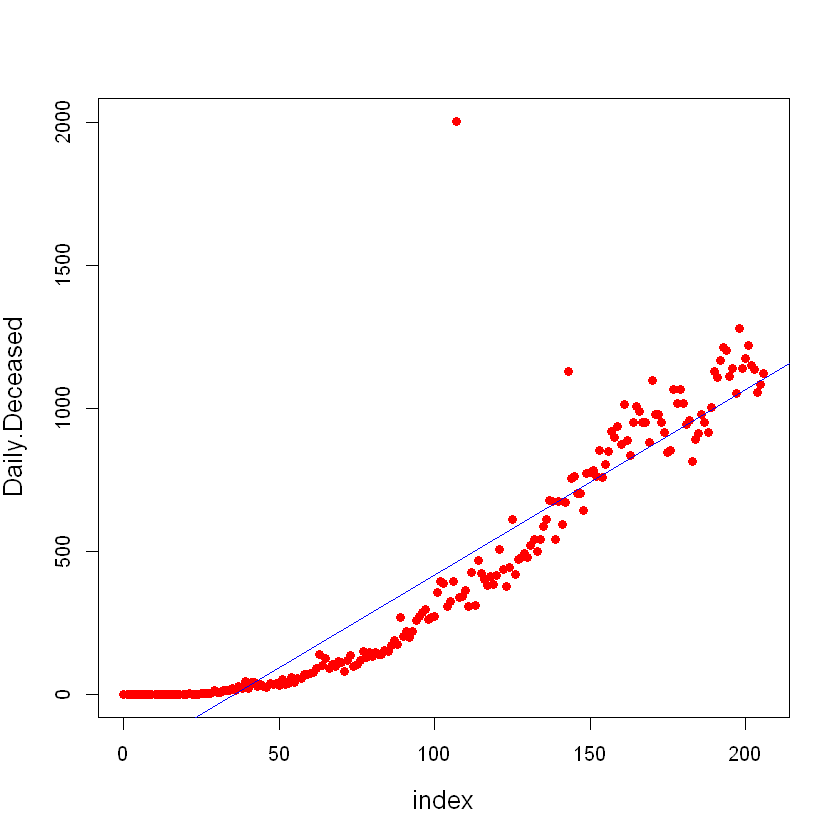

In [41]:
plot(index, Daily.Deceased, pch=16, ylab = "Daily.Deceased", cex.lab = 1.3, col = "red" )

abline(lm(Daily.Deceased ~ index), col = "blue")

In [46]:
index2 <- index^2
quadratic.model_dd <-lm(Daily.Deceased ~ index + index2)

In [47]:
summary(quadratic.model_dd)


Call:
lm(formula = Daily.Deceased ~ index + index2)

Residuals:
    Min      1Q  Median      3Q     Max 
-207.87  -53.66  -16.22   36.50 1626.55 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -58.562314  28.390987  -2.063   0.0404 *  
index         1.484372   0.636759   2.331   0.0207 *  
index2        0.024211   0.002992   8.092 5.21e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 137.5 on 204 degrees of freedom
Multiple R-squared:  0.8931,	Adjusted R-squared:  0.892 
F-statistic: 851.7 on 2 and 204 DF,  p-value: < 2.2e-16


In [48]:
quadratic.model_dd


Call:
lm(formula = Daily.Deceased ~ index + index2)

Coefficients:
(Intercept)        index       index2  
  -58.56231      1.48437      0.02421  


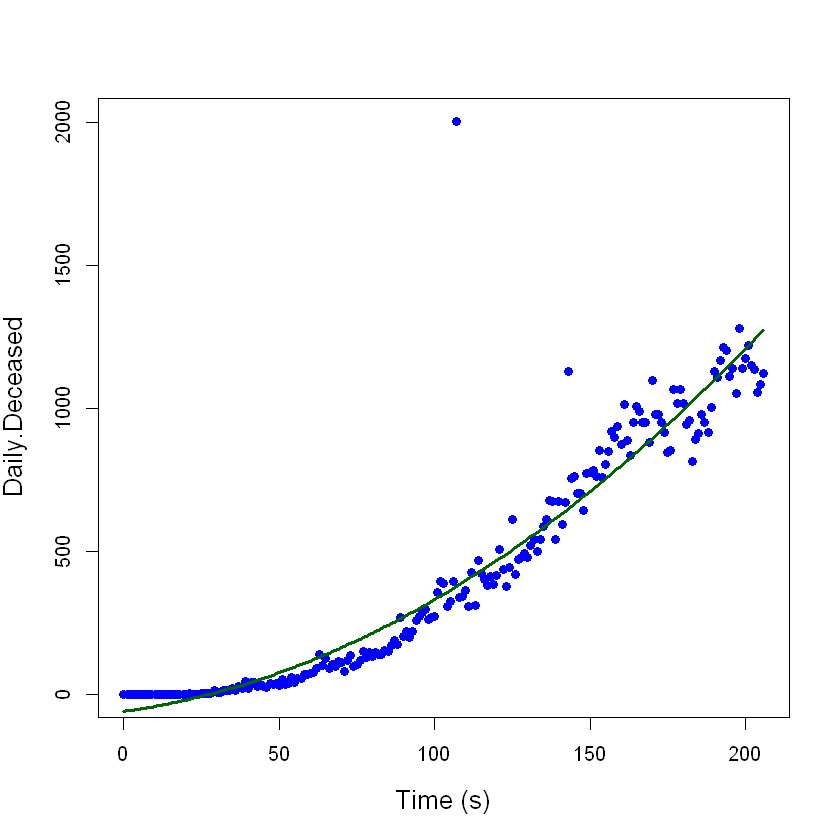

In [49]:
timevalues <- seq(0, 206, 1)
predictedcounts <- predict(quadratic.model_dd,list(index=timevalues, index2=timevalues^2))
plot(index, Daily.Deceased, pch=16, xlab = "Time (s)", ylab = "Daily.Deceased", cex.lab = 1.3, col = "blue")
lines(timevalues, predictedcounts, col = "darkgreen", lwd = 3)

In [50]:
index2 <- index^2
index3 <- index^3
poly.model_dd <-lm(Daily.Deceased ~ index + index2 + index3)

In [51]:
summary(poly.model_dd)


Call:
lm(formula = Daily.Deceased ~ index + index2 + index3)

Residuals:
    Min      1Q  Median      3Q     Max 
-208.39  -48.01   -0.93   22.17 1620.38 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.496e+01  3.595e+01   1.250   0.2126    
index       -4.620e+00  1.515e+00  -3.049   0.0026 ** 
index2       9.847e-02  1.712e-02   5.753 3.19e-08 ***
index3      -2.403e-04  5.461e-05  -4.401 1.74e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 131.7 on 203 degrees of freedom
Multiple R-squared:  0.9024,	Adjusted R-squared:  0.9009 
F-statistic: 625.4 on 3 and 203 DF,  p-value: < 2.2e-16


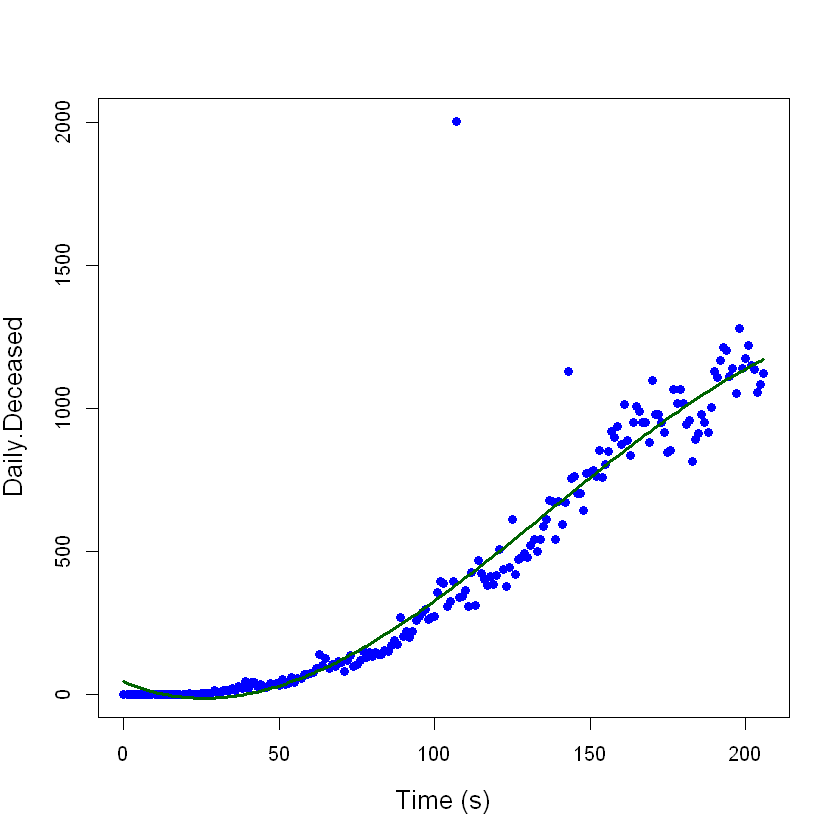

In [53]:
timevalues <- seq(0, 206, 1)
predictedcounts <- predict(poly.model_dd,list(index=timevalues, index2=timevalues^2, index3=timevalues^3))
plot(index, Daily.Deceased, pch=16, xlab = "Time (s)", ylab = "Daily.Deceased", cex.lab = 1.3, col = "blue")
lines(timevalues, predictedcounts, col = "darkgreen", lwd = 3)

In [54]:
logdd <- log(Daily.Deceased)
logdd[which(!is.finite(logdd))] <- 0

In [55]:
exponential.model_dd <- lm(logdd~ index)
summary(exponential.model_dd)


Call:
lm(formula = logdd ~ index)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1974 -0.7277  0.3193  0.7682  2.5659 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.376361   0.129703   10.61   <2e-16 ***
index       0.034211   0.001089   31.41   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9364 on 205 degrees of freedom
Multiple R-squared:  0.828,	Adjusted R-squared:  0.8271 
F-statistic: 986.5 on 1 and 205 DF,  p-value: < 2.2e-16


In [56]:
exponential.model_dd


Call:
lm(formula = logdd ~ index)

Coefficients:
(Intercept)        index  
    1.37636      0.03421  


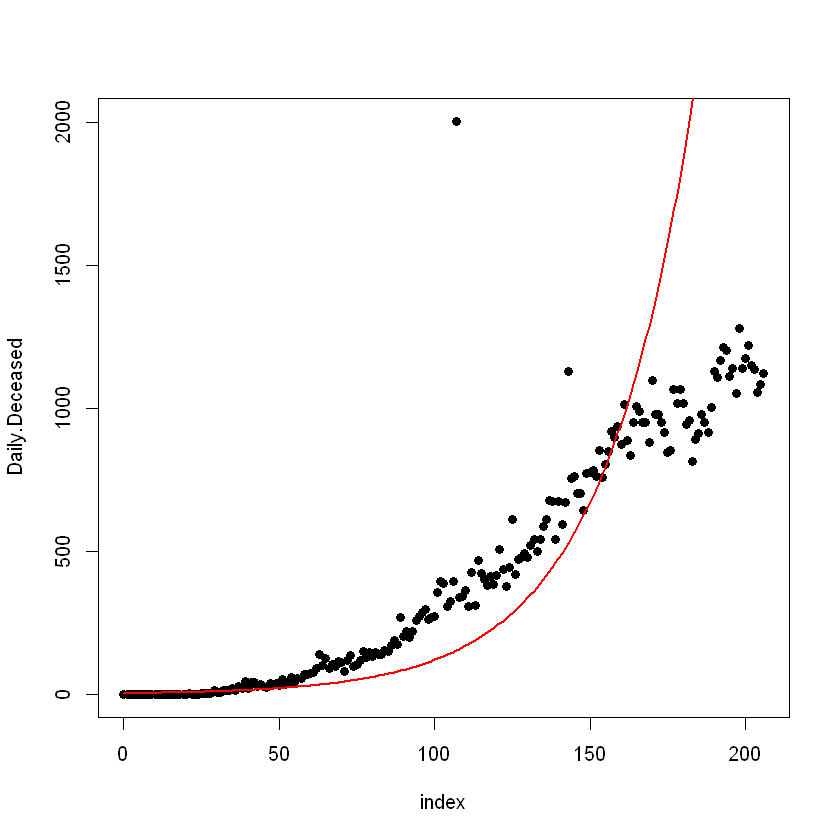

In [57]:
timevalues <- seq(0, 206, 1)
Counts.exponential2 <- exp(predict(exponential.model_dd,list(Time=timevalues)))
plot(index, Daily.Deceased,pch=16)
lines(timevalues, Counts.exponential2,lwd=2, col = "red", xlab = "Time (s)", ylab = "Daily.Deceased")

In [76]:
Daily.Active <- Total.Confirmed - Daily.Recovered - Daily.Deceased

In [77]:
linear.model_da <-lm(Daily.Active ~ index)

In [78]:
summary(linear.model_da)


Call:
lm(formula = Daily.Active ~ index)

Residuals:
    Min      1Q  Median      3Q     Max 
-973582 -725325 -157078  593210 2204344 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1171401.1   112677.5  -10.40   <2e-16 ***
index          22372.2      946.2   23.64   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 813500 on 205 degrees of freedom
Multiple R-squared:  0.7317,	Adjusted R-squared:  0.7304 
F-statistic:   559 on 1 and 205 DF,  p-value: < 2.2e-16


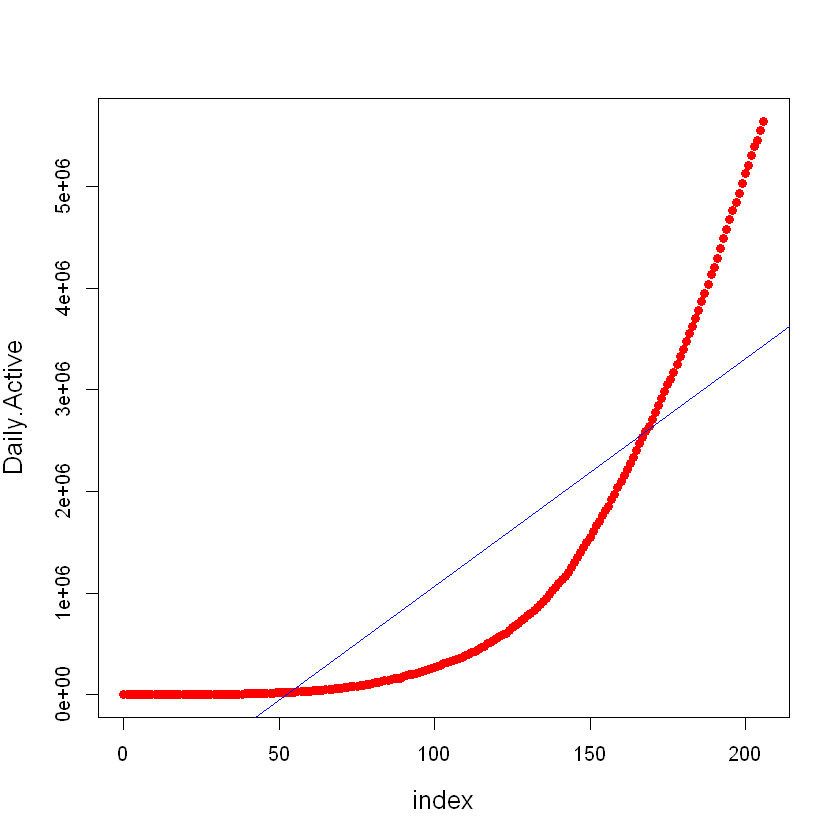

In [79]:
plot(index, Daily.Active, pch=16, ylab = "Daily.Active", cex.lab = 1.3, col = "red" )

abline(lm(Daily.Active ~ index), col = "blue")

In [80]:
index2 <- index^2
quadratic.model_da <-lm(Daily.Active ~ index + index2)

In [81]:
summary(quadratic.model_da)


Call:
lm(formula = Daily.Active ~ index + index2)

Residuals:
    Min      1Q  Median      3Q     Max 
-533615 -211748   11701  218201  499326 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 533617.709  49618.126   10.75   <2e-16 ***
index       -27530.821   1112.846  -24.74   <2e-16 ***
index2         242.248      5.229   46.33   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 240300 on 204 degrees of freedom
Multiple R-squared:  0.9767,	Adjusted R-squared:  0.9765 
F-statistic:  4277 on 2 and 204 DF,  p-value: < 2.2e-16


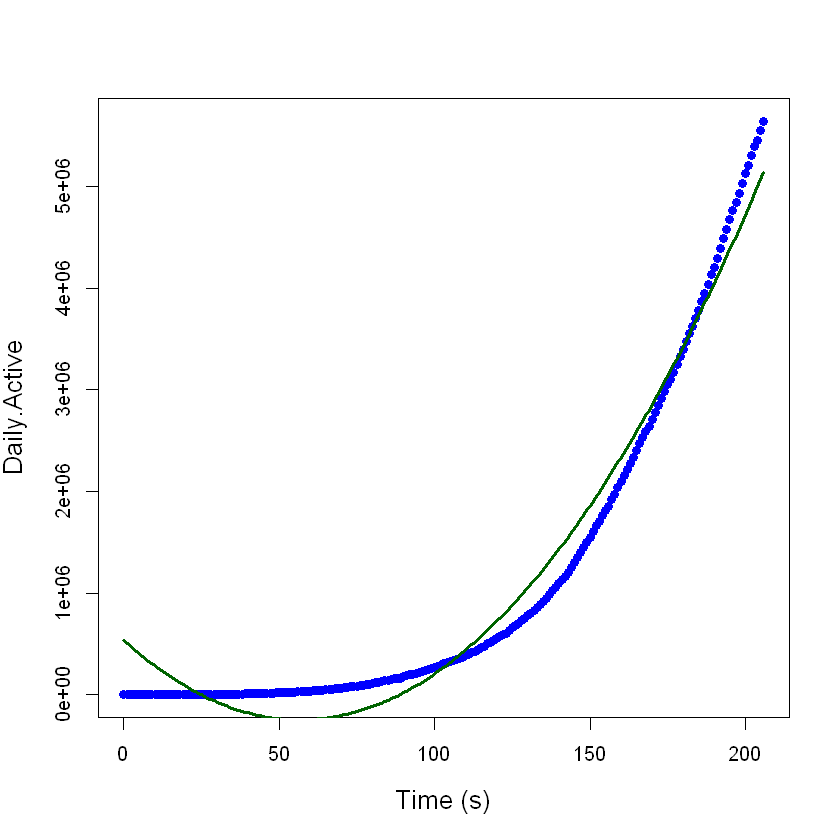

In [82]:
timevalues <- seq(0, 206, 1)
predictedcounts <- predict(quadratic.model_da,list(index=timevalues, index2=timevalues^2))
plot(index, Daily.Active, pch=16, xlab = "Time (s)", ylab = "Daily.Active", cex.lab = 1.3, col = "blue")
lines(timevalues, predictedcounts, col = "darkgreen", lwd = 3)

In [86]:
index2 <- index^2
index3 <- index^3
poly.model_da <-lm(Daily.Active ~ index + index2 + index3)

In [87]:
summary(poly.model_da)


Call:
lm(formula = Daily.Active ~ index + index2 + index3)

Residuals:
    Min      1Q  Median      3Q     Max 
-106687  -27731    6411   30457   72398 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.240e+04  9.918e+03   -7.30  6.4e-12 ***
index        8.204e+03  4.179e+02   19.63  < 2e-16 ***
index2      -1.925e+02  4.721e+00  -40.77  < 2e-16 ***
index3       1.407e+00  1.506e-02   93.40  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 36320 on 203 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9995 
F-statistic: 1.277e+05 on 3 and 203 DF,  p-value: < 2.2e-16


NULL

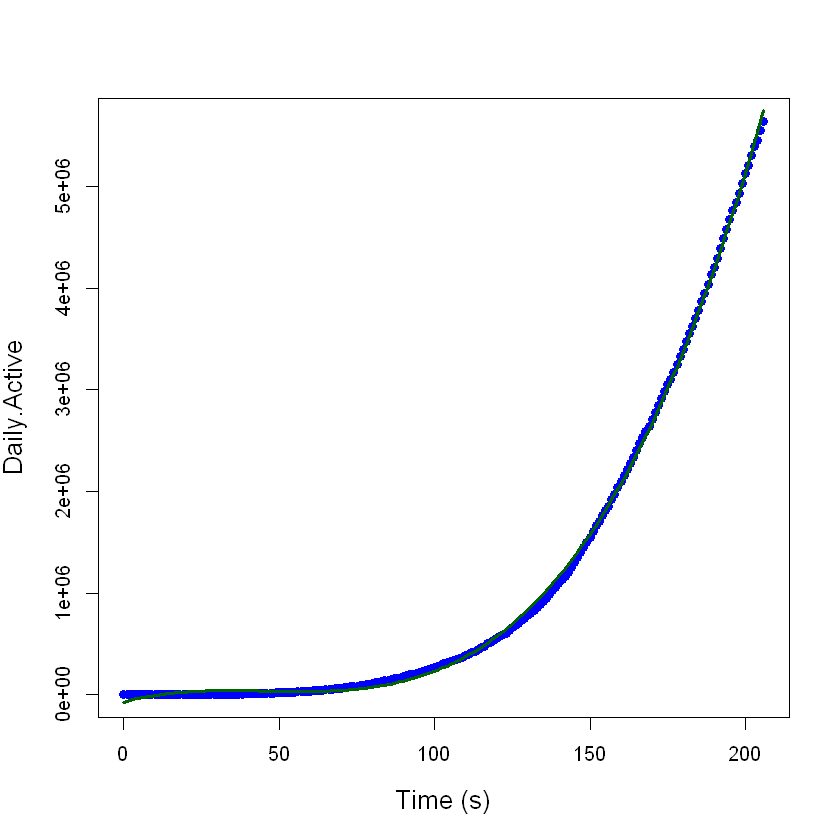

In [88]:
timevalues <- seq(0, 206, 1)
predictedcounts <- predict(poly.model_da,list(index=timevalues, index2=timevalues^2, index3=timevalues^3))
plot(index, Daily.Active, pch=16, xlab = "Time (s)", ylab = "Daily.Active", cex.lab = 1.3, col = "blue")
lines(timevalues, predictedcounts, col = "darkgreen", lwd = 3)